In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur agar visualisasi tampil di notebook
%matplotlib inline

# Muat dataset
# Ganti 'path/to/your/train.csv' dengan lokasi file Anda
df = pd.read_csv('train.csv')

# Tampilkan 5 baris pertama data
print("5 Baris Pertama Data:")
print(df.head())

# Tampilkan informasi dasar tentang dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

In [2]:
# Hitung jumlah missing values di setiap kolom
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Kolom dengan Missing Values:")
print(missing_values[missing_values > 0])

Kolom dengan Missing Values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [3]:
# Contoh mengisi missing values
# Kolom 'LotFrontage' (numerik) diisi dengan median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Kolom 'GarageType' (kategorikal) diisi dengan modus
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

# Untuk semplicitas, kita hapus kolom dengan > 50% data hilang
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# Verifikasi kembali setelah dibersihkan (untuk kolom yang sudah ditangani)
print("\nMissing values setelah penanganan sederhana:")
print(df[['LotFrontage', 'GarageType']].isnull().sum())


Missing values setelah penanganan sederhana:
LotFrontage    0
GarageType     0
dtype: int64


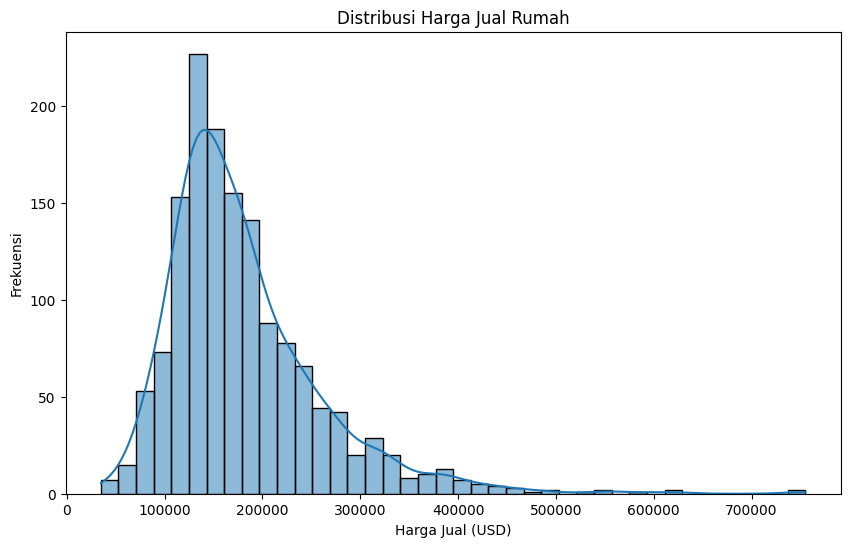

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=40)
plt.title('Distribusi Harga Jual Rumah')
plt.xlabel('Harga Jual (USD)')
plt.ylabel('Frekuensi')
plt.show()

# Tampilkan ringkasan statistik untuk SalePrice
print(df['SalePrice'].describe())

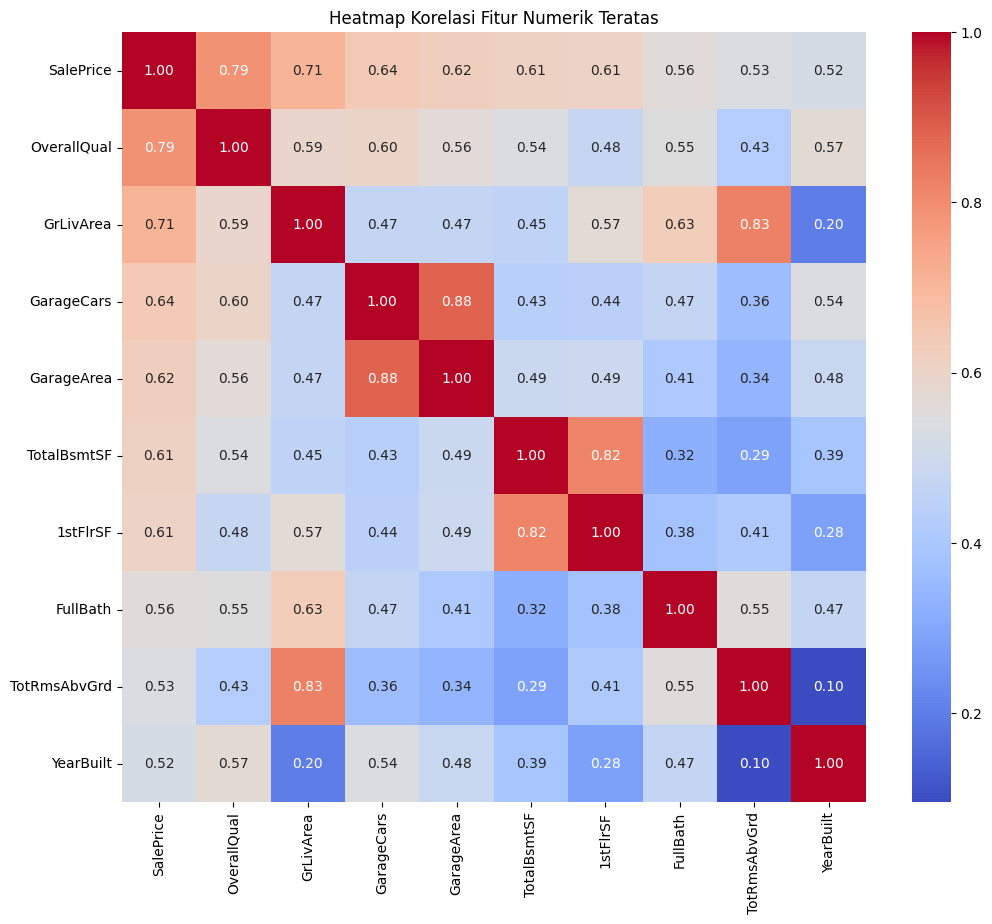

In [6]:
# Membuat heatmap korelasi untuk melihat hubungan antar variabel numerik
plt.figure(figsize=(12, 10))
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
# Pilih 10 fitur dengan korelasi tertinggi dengan SalePrice
korelasi_tertinggi = numeric_df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
matriks_korelasi = numeric_df[korelasi_tertinggi].corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik Teratas')
plt.show()

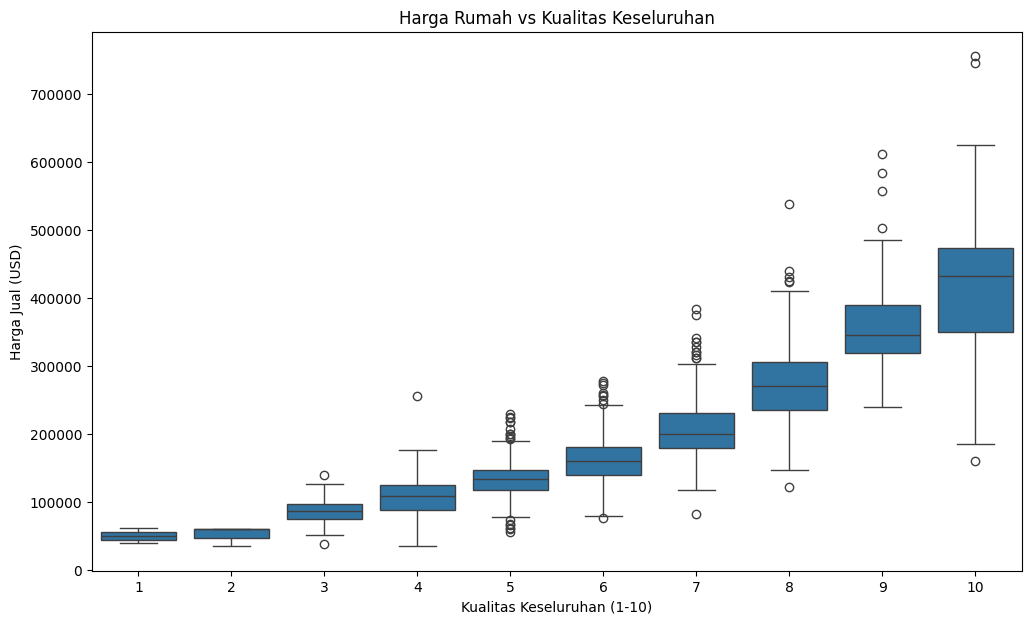

In [7]:
# Boxplot untuk melihat hubungan antara kualitas keseluruhan ('OverallQual') dan harga
plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Harga Rumah vs Kualitas Keseluruhan')
plt.xlabel('Kualitas Keseluruhan (1-10)')
plt.ylabel('Harga Jual (USD)')
plt.show()

In [10]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]

# Contoh jika kita ingin memasukkan 'GarageType'
# X = pd.get_dummies(X, columns=['GarageType'], drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Model Regresi Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error

# Hitung RMSE untuk Regresi Linear
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
print(f"RMSE Model Regresi Linear: ${lr_rmse:,.2f}")

# Hitung RMSE untuk Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f"RMSE Model Random Forest: ${rf_rmse:,.2f}")

RMSE Model Regresi Linear: $39,652.79
RMSE Model Random Forest: $30,077.85
